# Dit notebook volgt de uitdijingsgeschiedenis van een supernovarestant

In [1]:
import numpy as np

In [2]:
#Matplotlib configuration
from matplotlib import pyplot as plt

#A4 tufte layout paper figure sizes
MARGIN_FIG = lambda scale: (1.99, 1.99*scale)
MAIN_FIG = lambda scale: (4.18, 4.18*scale)
FULL_FIG = lambda scale: (6.64, 6.64*scale)

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='Fira Code')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#Other matplotlib configuration
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

<Figure size 300.96x150.48 with 0 Axes>

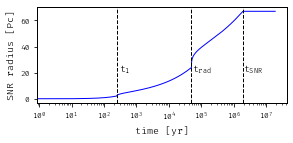

In [3]:
#calculate times and radii
M_ej=1.4
n0 = 1
t1 = 186 * M_ej**(5/6) * n0**(-1/3)
R1 = 1.91 * M_ej**(1/3)
t2 = 49.3e3 * n0**(-0.55)
R2 = 24 * n0**(-0.42)
t3 = 1.87e6*n0**(-0.37)
R3 = 67 * n0**(-0.37)

def expansion(t):  
  R = R1*t/t1
  R[np.where(t >= t1)] = R1 + (R2-R1)*((t[np.where(t >= t1)] - t1)/(t2 - t1))**(2/5)
  R[np.where(t >= t2)] = R2 + (R3-R2)*((t[np.where(t >= t2)] - t2)/(t3 - t2))**(2/7)
  R[np.where(t >= t3)] = R3
  return R

t = np.linspace(0, t3*10, 10000000)

plt.figure(figsize=MAIN_FIG(0.5))
plt.figure(figsize=MAIN_FIG(0.5))
plt.plot(t, expansion(t), color='b')

plt.axvline(t1, color='black', linestyle='--')
plt.text(t1+50, 20, '$t_1$')
plt.axvline(t2, color='black', linestyle='--')
plt.text(t2+1000, 20, '$t_{rad}$')
plt.axvline(t3, color='black', linestyle='--')
plt.text(t3+100000, 20, '$t_{SNR}$')

plt.xscale('log')
plt.ylabel('SNR radius [Pc]')
plt.xlabel('time [yr]')
plt.savefig('../figs/snr_evolution.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

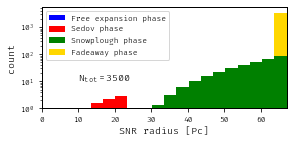

In [4]:
R = expansion(t)
n, bins = np.histogram(R, bins=20)
width = bins[1] - bins[0]
norm = 3500/np.sum(n)

linear = np.histogram(R[np.ma.masked_where(t <= t1, R).mask], bins)[0]*norm
sedov = np.histogram(R[np.ma.masked_where((t > t1) & (t <= t2), R).mask], bins)[0]*norm
rad = np.histogram(R[np.ma.masked_where((t > t2) & (t <= t3), R).mask], bins)[0]*norm
fade = np.histogram(R[np.ma.masked_where(t > t3, R).mask], bins)[0]*norm

plt.figure(figsize=MAIN_FIG(0.5))
plt.bar(bins[:-1], linear, color='b', width=width, align='edge', label='Free expansion phase')
plt.bar(bins[:-1], sedov, color='r', bottom=linear, width=width, align='edge', label='Sedov phase')
plt.bar(bins[:-1], rad, color='g', bottom=linear+sedov, width=width, align='edge', label='Snowplough phase')
plt.bar(bins[:-1], fade, color='gold', bottom=linear+sedov+rad, width=width, align='edge', label='Fadeaway phase')
plt.xlabel('SNR radius [Pc]')
plt.text(10, 10, '$N_{tot}=3500$')
plt.yscale('log')
plt.ylabel('count')
plt.ylim(bottom=1)
plt.legend()
plt.xlim(np.min(bins), np.max(bins))
plt.savefig('../figs/snr_histo.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)

In [5]:
#save and stuff
np.savetxt('../tmp/snr_distr.csv', R)